# Countour Detection

Contorno #1 -- Area: 9604.00, Perimetero: 392.00
Contorno #2 -- Area: 14641.00, Perimetero: 484.00
Contorno #3 -- Area: 8965.00, Perimetero: 436.00
Contorno #4 -- Area: 37385.00, Perimetero: 722.72
Contorno #5 -- Area: 4620.00, Perimetero: 298.00
Contorno #6 -- Area: 10816.00, Perimetero: 416.00
Contorno #7 -- Area: 3969.00, Perimetero: 252.00
Contorno #8 -- Area: 30276.00, Perimetero: 696.00
Contorno #9 -- Area: 8550.00, Perimetero: 517.48
Contorno #10 -- Area: 7970.00, Perimetero: 446.79
Contorno #11 -- Area: 1681.00, Perimetero: 164.00
Contorno #12 -- Area: 7632.00, Perimetero: 414.00
Contorno #13 -- Area: 14593.00, Perimetero: 508.33


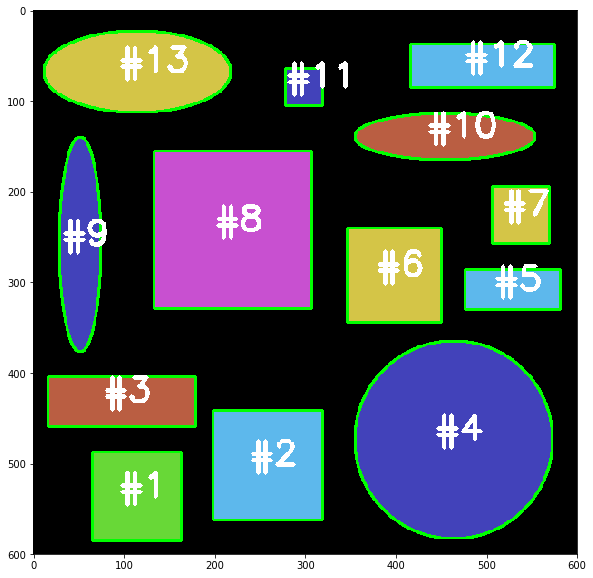

{'m00': 14593.0, 'm10': 1670898.5, 'm01': 985027.5, 'm20': 230264008.3333333, 'm11': 112785648.75, 'm02': 73864432.33333333, 'm30': 35283892743.25, 'm21': 15542820562.5, 'm12': 8457477502.166667, 'm03': 5981484453.75, 'mu20': 38946130.08333328, 'mu11': 0.0, 'mu02': 7375076.083333328, 'mu30': 7.62939453125e-06, 'mu21': -4.76837158203125e-07, 'mu12': 8.344650268554688e-07, 'mu03': 9.5367431640625e-07, 'nu20': 0.18288376131939701, 'nu11': 0.0, 'nu02': 0.0346319814382258, 'nu30': 2.965709562740706e-16, 'nu21': -1.8535684767129412e-17, 'nu12': 3.243744834247647e-17, 'nu03': 3.7071369534258824e-17}


In [3]:
import numpy as np
import argparse
import cv2
 
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline    
    
# Argumentos
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", default="images/shapes.png", help="Canminho para imagem")
#args = vars(ap.parse_args())
 
# Carrega imagem
image = cv2.imread("images/shapes.png")

# Converte para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# Encontra os contornos externos
cnts, _  = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
clone = image.copy()
 
# Loop por todos os contornos
for (i, c) in enumerate(cnts):
	# Calcula a área e o perímetro do contorno
	area = cv2.contourArea(c)
	perimeter = cv2.arcLength(c, True)
	print ("Contorno #%d -- Area: %.2f, Perimetero: %.2f" % (i + 1, area, perimeter))
 
	# Desenha o contorno na imagem
	cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
	# Calcula o centro do contorno e desenha o número do contorno
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	cv2.putText(clone, "#%d" % (i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
		1.25, (255, 255, 255), 4)
 
# Output
plt.figure(figsize=(18,10))
plt.imshow(clone)
plt.show()
#cv2.imshow("Contours", clone)
#cv2.waitKey(0)

print(M)